In [13]:
from nltk.corpus import gutenberg, brown, inaugural
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import requests
import json
import nltk
%matplotlib inline

# Working with Corpora

An easy way to get lots of example texts is to use the built-in NLTK corpus "gutenberg": 

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
whitmanWords = gutenberg.words('whitman-leaves.txt')

In [11]:
len(whitmanWords)

154883

In [14]:
# This creates a list of lists, with all the tokens for all the texts
allTokens = []
for fileid in gutenberg.fileids():
    allTokens.append(gutenberg.words(fileid))

In [15]:
len(allTokens)

18

In [18]:
for wordList in allTokens: 
    print(len(wordList))

192427
98171
141576
1010654
8354
55563
18963
34110
96996
86063
69213
210663
260819
96825
25833
37360
23140
154883


In [19]:
tokensDict = {}
for fileid in gutenberg.fileids(): 
    tokensDict[fileid] = gutenberg.words(fileid)

In [21]:
len(tokensDict['austen-emma.txt'])

192427

In [23]:
tokensDict = {}
for fileid in gutenberg.fileids():
    tokensDict[fileid] = {"tokens": gutenberg.words(fileid),
                          "numTokens": len(gutenberg.words(fileid))}

In [29]:
allLengths = {}
for fileid in gutenberg.fileids():
    allLengths[fileid[:-4]] = len(gutenberg.words(fileid))

In [30]:
allLengths

{'austen-emma': 192427,
 'austen-persuasion': 98171,
 'austen-sense': 141576,
 'bible-kjv': 1010654,
 'blake-poems': 8354,
 'bryant-stories': 55563,
 'burgess-busterbrown': 18963,
 'carroll-alice': 34110,
 'chesterton-ball': 96996,
 'chesterton-brown': 86063,
 'chesterton-thursday': 69213,
 'edgeworth-parents': 210663,
 'melville-moby_dick': 260819,
 'milton-paradise': 96825,
 'shakespeare-caesar': 25833,
 'shakespeare-hamlet': 37360,
 'shakespeare-macbeth': 23140,
 'whitman-leaves': 154883}

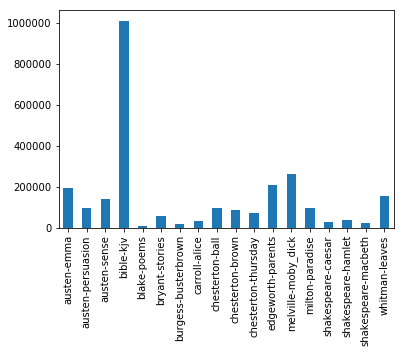

In [35]:
pd.Series(allLengths).plot(kind='bar')

# Type-token ratio

"the the the the that's all folks!" 
 - 9 tokens
 - 6 types

Type/token ratio: 6/9

In [38]:
porkyWords = "the the the the that's all folks!".split()
porkyWords

['the', 'the', 'the', 'the', "that's", 'all', 'folks!']

In [39]:
set(porkyWords)

{'all', 'folks!', "that's", 'the'}

In [40]:
def typeTokenRatio(tokens): 
    numTypes = len(set(tokens))
    numTokens = len(tokens)
    return numTypes/numTokens

In [41]:
ttrs = {}
for fileid in gutenberg.fileids():
    tokens = gutenberg.words(fileid)
    ttrs[fileid] = typeTokenRatio(tokens)

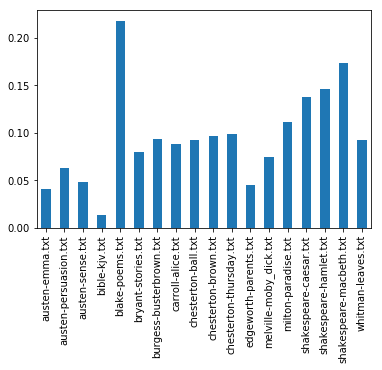

In [43]:
pd.Series(ttrs).plot(kind='bar')

In [48]:
allLengths

{'austen-emma': 192427,
 'austen-persuasion': 98171,
 'austen-sense': 141576,
 'bible-kjv': 1010654,
 'blake-poems': 8354,
 'bryant-stories': 55563,
 'burgess-busterbrown': 18963,
 'carroll-alice': 34110,
 'chesterton-ball': 96996,
 'chesterton-brown': 86063,
 'chesterton-thursday': 69213,
 'edgeworth-parents': 210663,
 'melville-moby_dick': 260819,
 'milton-paradise': 96825,
 'shakespeare-caesar': 25833,
 'shakespeare-hamlet': 37360,
 'shakespeare-macbeth': 23140,
 'whitman-leaves': 154883}

In [49]:
allLengths.items()

dict_items([('austen-emma', 192427), ('austen-persuasion', 98171), ('austen-sense', 141576), ('bible-kjv', 1010654), ('blake-poems', 8354), ('bryant-stories', 55563), ('burgess-busterbrown', 18963), ('carroll-alice', 34110), ('chesterton-ball', 96996), ('chesterton-brown', 86063), ('chesterton-thursday', 69213), ('edgeworth-parents', 210663), ('melville-moby_dick', 260819), ('milton-paradise', 96825), ('shakespeare-caesar', 25833), ('shakespeare-hamlet', 37360), ('shakespeare-macbeth', 23140), ('whitman-leaves', 154883)])

In [56]:
truncatedTokens = {}
for key, tokens in tokensDict.items(): 
    truncated = tokens['tokens'][:8000]
    truncatedTokens[key] = truncated

In [57]:
len(truncatedTokens['austen-emma.txt'])

8000

In [58]:
ttrTruncated = {}
for key, tokens in truncatedTokens.items():
    ttr = typeTokenRatio(tokens)
    ttrTruncated[key] = ttr

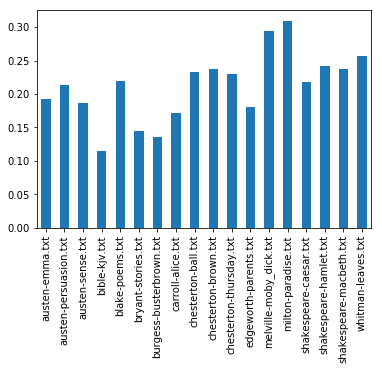

In [60]:
pd.Series(ttrTruncated).plot(kind='bar')

In [62]:
inauguralTTR = {}
for fileid in inaugural.fileids():
    inauguralTTR[fileid[:-4]] = typeTokenRatio(inaugural.words(fileid))

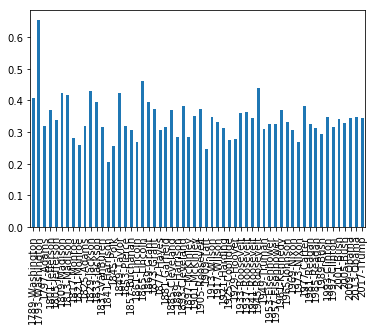

In [64]:
pd.Series(inauguralTTR).plot(kind='bar')

In [69]:
brownCategoriesTTRs = {}
for category in brown.categories():
    words = brown.words(categories=category)
    ttr = typeTokenRatio(words)
    brownCategoriesTTRs[category] = ttr

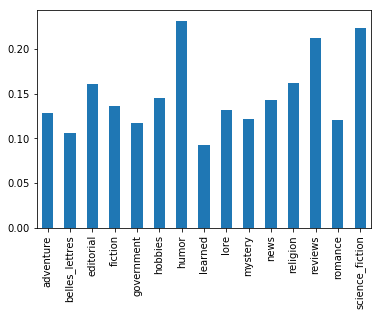

In [70]:
pd.Series(brownCategoriesTTRs).plot(kind='bar')

In [ ]:
# Don't do this!
bet = moonstoneParts[2]
clack = moonstoneParts[4]
betTokens = nltk.word_tokenize(bet)
clackTokens = nltk.word_tokenize(clack)
# Instead, do this: 
allTokens = []
for text in [bet, clack]:
    tokens = nltk.word_tokenize(text)
    allTokens.append(tokens)


# Stylometry

- "Style": most frequent 100-800 words
- "Content": lesser frequent

TF/IDF: term frequency (adjusted for) inverse document frequency

In [10]:
import sklearn # scikit-learn
import nltk

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA

In [12]:
rawTexts = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

In [13]:
[text[:50] for text in rawTexts]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\n',
 '[Persuasion by Jane Austen 1818]\n\n\nChapter 1\n\n\nSir',
 '[Sense and Sensibility by Jane Austen 1811]\n\nCHAPT',
 '[The King James Bible]\n\nThe Old Testament of the K',
 '[Poems by William Blake 1789]\n\n \nSONGS OF INNOCENC',
 '[Stories to Tell to Children by Sara Cone Bryant 1',
 '[The Adventures of Buster Bear by Thornton W. Burg',
 "[Alice's Adventures in Wonderland by Lewis Carroll",
 '[The Ball and The Cross by G.K. Chesterton 1909]\n\n',
 '[The Wisdom of Father Brown by G. K. Chesterton 19',
 '[The Man Who Was Thursday by G. K. Chesterton 1908',
 "[The Parent's Assistant, by Maria Edgeworth]\r\n\r\n\r\n",
 '[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY',
 '[Paradise Lost by John Milton 1667] \n \n \nBook I \n ',
 '[The Tragedie of Julius Caesar by William Shakespe',
 '[The Tragedie of Hamlet by William Shakespeare 159',
 '[The Tragedie of Macbeth by William Shakespeare 16',
 '[Leaves of Grass by Walt 

In [14]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, max_features=400)

In [15]:
tfMatrix = tfidf.fit_transform(rawTexts)

In [16]:
labels = [fileid[:-4] for fileid in gutenberg.fileids()]

In [17]:
wordLabels = tfidf.get_feature_names()

In [18]:
wordLabels[:10]

['!', "'", "''", "'d", "'ll", "'s", '(', ')', ',', '--']

In [19]:
df = pd.DataFrame(tfMatrix.todense(), index=labels, columns=wordLabels)

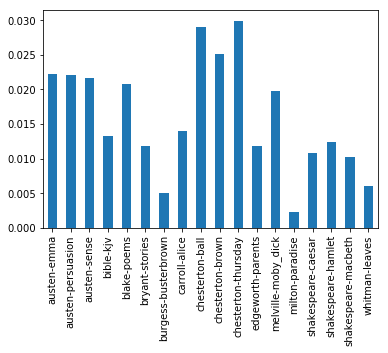

In [20]:
df['an'].plot(kind='bar')

In [21]:
df[df.index.str.contains('austen')]['an'].mean()

0.022016027509858444

In [22]:
def meanAnPerAuthor(author):
    return df[df.index.str.contains(author)]['an'].mean()

In [23]:
meanAnPerAuthor('austen')

0.022016027509858444

In [24]:
meanAnPerAuthor('chesterton')

0.028050413857194142

In [25]:
meanAnPerAuthor('shakes')

0.011159922379835535

In [26]:
unknown = open('allswell.txt').read()

In [27]:
unknownTokens = nltk.word_tokenize(unknown)

In [28]:
unknownTokens.count('an') / len(unknownTokens)

0.001654393875498751

In [29]:
def guessAuthor(freqAn): 
    labels = ['austen', 'chesterton', 'shakespeare']
    means = [meanAnPerAuthor(label) for label in labels]
    diffs = [mean-freqAn for mean in means]
    indexOfMin = diffs.index(min(diffs))
    return labels[indexOfMin]

In [30]:
guessAuthor(0.001654393875498751)

'shakespeare'

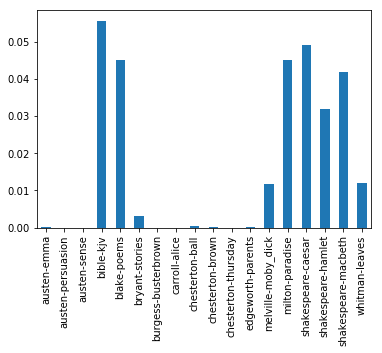

In [31]:
df['thou'].plot(kind='bar')

In [32]:
pca = PCA(n_components=2)

In [33]:
pcaOut = pca.fit_transform(tfMatrix.todense())

In [34]:
pcaDF = pd.DataFrame(pcaOut, index=labels, columns=['Component 1', 'Component 2'])

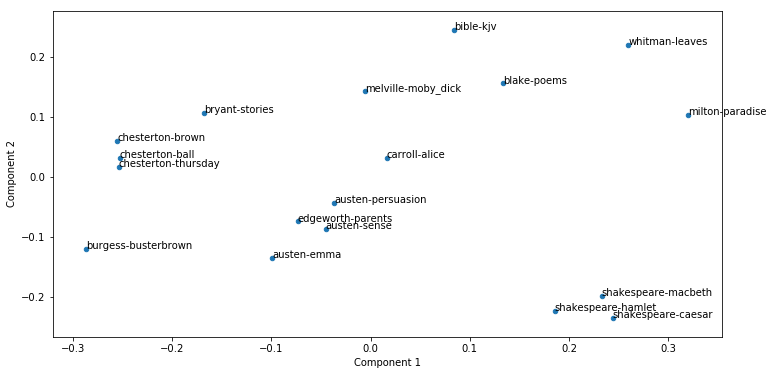

In [35]:
ax = pcaDF.plot(x='Component 1', y='Component 2', kind='scatter', figsize=(12,6))
for key, value in pcaDF.iterrows():
    ax.annotate(key, value)

In [36]:
def getAuthorTexts(author, n=10): 
    response = requests.get('http://corpus-db.org/api/author/'+author+'/fulltext')
    if response.ok:
        decoded = json.loads(response.text)
        return [t['text'] for t in decoded[:n]]

In [37]:
def getAuthorMeta(author, n=10):
    response = requests.get('http://corpus-db.org/api/author/'+author)
    if response.ok:
        decoded = json.loads(response.text)
        return decoded[:n]

In [38]:
def getAuthorTitles(author): 
    meta = getAuthorMeta(author)
    return [item['title'] for item in meta]

In [39]:
thoroughfare = json.loads(requests.get('http://corpus-db.org/api/id/1423.0/fulltext').text)

In [40]:
thoroughfareText = thoroughfare[0]['text']

In [45]:
def getTitlesAndTexts(auth): 
    return getAuthorTitles(auth), getAuthorTexts(auth)

In [46]:
dickensTitles, dickensTexts = getTitlesAndTexts('Dickens, Charles')

In [47]:
collinsTitles, collinsTexts = getTitlesAndTexts('Collins, Wilkie')

In [48]:
dickensTitles

['A Christmas Carol in Prose; Being a Ghost Story of Christmas',
 'A Tale of Two Cities',
 'The Mystery of Edwin Drood',
 'The Pickwick Papers',
 "Master Humphrey's Clock",
 "The Haunted Man and the Ghost's Bargain",
 'Pictures from Italy',
 'The Chimes: A Goblin Story of Some Bells That Rang an Old Year out and a New Year In',
 'American Notes',
 'The Battle of Life']

In [49]:
collinsTitles

['The Moonstone',
 'The Haunted Hotel: A Mystery of Modern Venice',
 'The Woman in White',
 'No Name',
 'Man and Wife',
 'The Black Robe',
 "A Rogue's Life",
 'Miss or Mrs.?',
 'The Law and the Lady',
 'The New Magdalen']

In [55]:
tfMatrix = tfidf.fit_transform(dickensTexts + collinsTexts + [thoroughfareText])

In [56]:
pcaOut = pca.fit_transform(tfMatrix.todense())

In [57]:
df = pd.DataFrame(pcaOut, index=dickensTitles + collinsTitles + ['No ThoroughFare'], 
                  columns=['C1', 'C2']) 

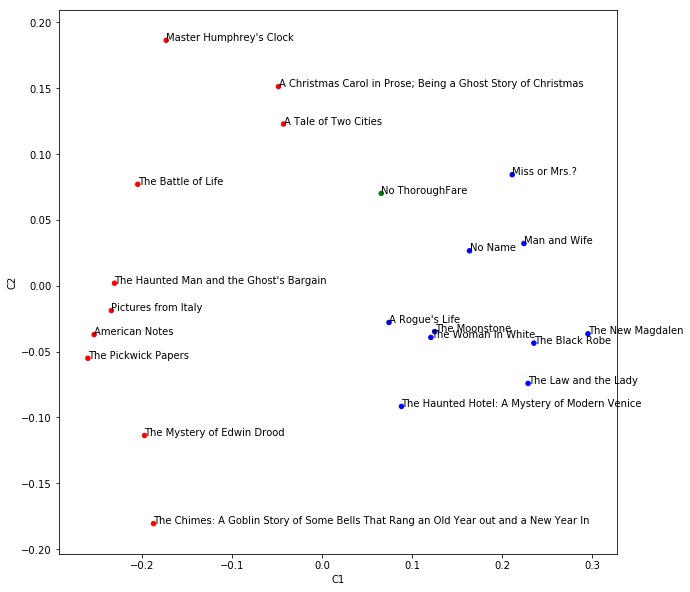

In [59]:
ax = df.plot(x='C1', y='C2', kind='scatter', figsize=(10,10), c=list('r'*10 + 'b'*10 + 'g'))
for key, value in df.iterrows():
    ax.annotate(key, value)

# A Comparative Stylometry of Katherine Mansfield Stories

1. Split the garden-party.md file into stories. 
2. Get labels for them (titles)
3. Vectorize the stories using TfidfVectorizer(max_features=400)
4. Transform this into 2D using PCA(n_components=2)
5. Make a scatter plot using Pandas. And annotate the points. 

In [1]:
gardenRaw = open('../Texts/garden-party.md').read()

In [2]:
gardenStories = gardenRaw.split('\n# ')

In [155]:
len(gardenStories)

15

In [63]:
[story[:50] for story in gardenStories]

['# 1. AT THE BAY.\n## Chapter 1.I.\n\nVery early morni',
 '2. THE GARDEN PARTY.\n\nAnd after all the weather wa',
 '3. THE DAUGHTERS OF THE LATE COLONEL.\n\n## Chapter ',
 '4. MR. AND MRS. DOVE.\n\nOf course he knew---no man ',
 '5. THE YOUNG GIRL.\n\nIn her blue dress, with her ch',
 '6. LIFE OF MA PARKER.\n\nWhen the literary gentleman',
 '7. MARRIAGE A LA MODE.\n\nOn his way to the station ',
 '8. THE VOYAGE.\n\nThe Picton boat was due to leave a',
 '9. MISS BRILL.\n\nAlthough it was so brilliantly fin',
 '10. HER FIRST BALL.\n\nExactly when the ball began L',
 '11. THE SINGING LESSON.\n\nWith despair---cold, shar',
 '12. THE STRANGER\n\nIt seemed to the little crowd on',
 '13. BANK HOLIDAY.\n\nA stout man with a pink face we',
 '14. AN IDEAL FAMILY.\n\nThat evening for the first t',
 "15. The Lady's Maid\n\nEleven o'clock. A knock at th"]

In [17]:
def getTitle(story): 
    firstPeriod = story.find('.')
    firstLineBreak = story.find('\n')
    title = story[firstPeriod + 2 : firstLineBreak]
    if title.endswith('.'): 
        title = title[:-1]
    return title

In [18]:
titles = [getTitle(story) for story in gardenStories]

In [19]:
titles

['AT THE BAY',
 'THE GARDEN PARTY',
 'THE DAUGHTERS OF THE LATE COLONEL',
 'MR. AND MRS. DOVE',
 'THE YOUNG GIRL',
 'LIFE OF MA PARKER',
 'MARRIAGE A LA MODE',
 'THE VOYAGE',
 'MISS BRILL',
 'HER FIRST BALL',
 'THE SINGING LESSON',
 'THE STRANGER',
 'BANK HOLIDAY',
 'AN IDEAL FAMILY',
 "The Lady's Maid"]

In [144]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, 
                        max_df=0.7, stop_words='english')

In [145]:
#shortestLength = min([len(story) for story in gardenStories])
#gardenStories = [story[:shortestLength] for story in gardenStories]

In [146]:
tfMatrix = tfidf.fit_transform(gardenStories)

In [147]:
words = tfidf.get_feature_names()

In [148]:
tfMatrix.shape

(15, 3224)

In [149]:
pca = PCA(n_components=2)
pcaOut = pca.fit_transform(tfMatrix.todense())

In [150]:
df = pd.DataFrame(pcaOut, index=titles, columns=['C1', 'C2'])

In [151]:
df

,C1,C2
AT THE BAY,0.097291,0.144149
THE GARDEN PARTY,0.474276,-0.109415
THE DAUGHTERS OF THE LATE COLONEL,-0.194769,-0.055789
MR. AND MRS. DOVE,-0.181785,0.034423
THE YOUNG GIRL,-0.125894,-0.222204
LIFE OF MA PARKER,-0.320299,-0.433134
MARRIAGE A LA MODE,-0.179596,-0.109362
THE VOYAGE,-0.085749,0.513487
MISS BRILL,0.210702,-0.175770
HER FIRST BALL,0.494688,-0.170487


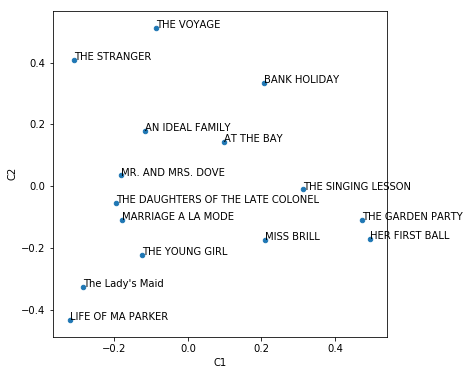

In [152]:
ax = df.plot(x=0, y=1, kind='scatter', figsize=(6, 6))
for x, y in df.iterrows():
    ax.annotate(x, y)

In [10]:
gardenParty = gardenStories[1]

In [234]:
gardenTrigrams = list(nltk.ngrams([w for w in nltk.word_tokenize(gardenParty) if w.isalpha()], 5))

In [235]:
enumeratedTrigrams = enumerate(gardenTrigrams)

In [3]:
import collections

In [237]:
counted = collections.Counter(gardenTrigrams).most_common(20)

In [238]:
[i for i, trigram in enumeratedTrigrams if trigram == (counted[0][0])]

[872, 1942]

In [11]:
gardenTokens = nltk.word_tokenize(gardenParty) 

In [14]:
tfidf = TfidfVectorizer(max_df=0.5, ngram_range=(1,7))
tfMatrix = tfidf.fit_transform(gardenStories)

In [15]:
wordLabels = tfidf.get_feature_names()

In [20]:
df = pd.DataFrame(tfMatrix.todense(), index=titles, columns=wordLabels)

In [21]:
outlyingWords = df.sum().sort_values(ascending=False)

In [24]:
outlyingWords[70:].head(20)

grandfather        0.076844
sadie              0.075470
bobby              0.075357
moira              0.075357
said constantia    0.074484
gold               0.074282
sir                0.073120
wharf              0.072117
sun                0.072062
chapter            0.071157
mrs sheridan       0.070439
miss wyatt         0.070108
said miss          0.070108
wyatt              0.070108
kember             0.069958
harry              0.069763
lennie             0.069047
the water          0.069046
doctor             0.068757
charles            0.068496
dtype: float64

In [278]:
def plotAcrossStories(wordList):
    counts = {}
    for title, story in zip(titles, gardenStories): 
        tokens = nltk.word_tokenize(story)
        counts[title] = {word: tokens.count(word)/len(tokens) for word in wordList}
    return counts

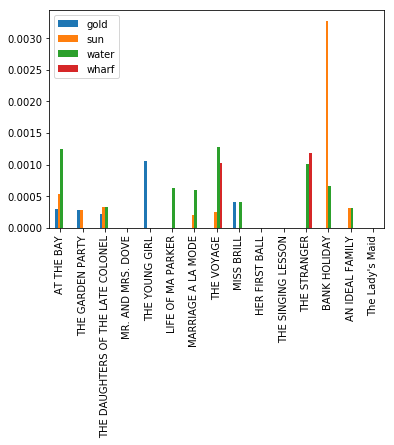

In [279]:
pd.DataFrame(plotAcrossStories(['gold', 'sun', 'wharf', 'water'])).T.plot(kind='bar')